# Mixed Heating Scaling for Nu<sub>Top</sub>, Nu<sub>Bottom</sub>, V<sub>RMS</sub>, and T<sub>i</sub>

In [1]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import matplotlib.ticker as mticker
import math

%config InlineBackend.figure_formats = ['svg']

In [2]:
# plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 9.
plt.rcParams['lines.markeredgewidth'] = 0.7

In [3]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [4]:
save_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Data\\'
Data = pd.read_csv(save_path+'data_MH.csv')
TiScaling = pd.read_csv(save_path+'\\MH_interiorTempScaling_Y(0)_&_slope.txt',header=None).to_numpy().T.flatten() 
#[y-intercept, slope]
NuScaling = pd.read_csv(save_path+'\\MH_nusseltScaling_beta_slopeH_slopeRa.txt',header=None).to_numpy().T.flatten() ; 
#[beta, slope of H, slope of Ra]

In [5]:
RaU = Data.Ra.unique()
lenRa = len(RaU)

dataS = [[] for i in range(lenRa)] #empty nested list for largest resolution value

for i in range(lenRa):
    dataS[i] = Data.loc[(Data['Ra'] == RaU[i])]

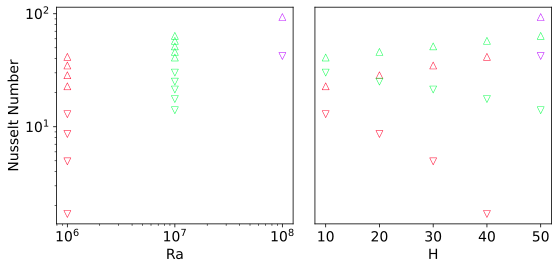

In [17]:
colors = plt.cm.gist_rainbow(np.linspace(0,0.9,lenRa))

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

fig = plt.figure(figsize=(8,4))

ax1 = plt.subplot(121)
for i in range(lenRa):
    plt.plot(dataS[i]['Ra'],dataS[i]['NuT'],'^',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i],mfc='none',mew=0.5)
    plt.plot(dataS[i]['Ra'],dataS[i]['NuB'],'v',color=colors[i],mfc='none',mew=0.5)
plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); 
plt.xscale('log');

ax2 = plt.subplot(122, sharey = ax1)
for i in range(lenRa):
    plt.plot(dataS[i]['H'],dataS[i]['NuT'],'^',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i],mfc='none',mew=0.5)
    plt.plot(dataS[i]['H'],dataS[i]['NuB'],'v',color=colors[i],mfc='none',mew=0.5)
plt.xlabel('H'); 
# plt.yscale('log');
ax2.yaxis.set_visible(False)
fig.tight_layout();

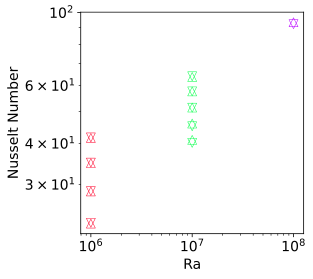

In [7]:
colors = plt.cm.gist_rainbow(np.linspace(0,0.9,lenRa))

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)
        
list1 = []; list2 = [];

nu = plt.figure(figsize=(4,4))
for i in range(lenRa):
    plt.plot(dataS[i]['Ra'],dataS[i]['NuT'],'^',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i],mfc='none',mew=0.5)
    plt.plot(dataS[i]['Ra'],dataS[i]['NuB']+dataS[i]['H'],'v',color=colors[i],mfc='none',mew=0.5)

list1.append(Data['Ra'].tolist()); list1.append(Data['Ra'].tolist())
list2.append(Data['NuT'].tolist()); list2.append((Data['NuB']+Data['H']).tolist())
list1 = flatten_list(list1)
list2 = flatten_list(list2)

plt.ylabel('Nusselt Number'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(1/3)

m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

xx = np.arange(1e7,np.max(RaU),1e4)
s='{}'.format(round(m1[0],4));

# plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
# plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{1/3}$');

# plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

# image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
# plt.savefig(image_path + 'scaling_nu.png',pad_inches=0.1,bbox_inches='tight');

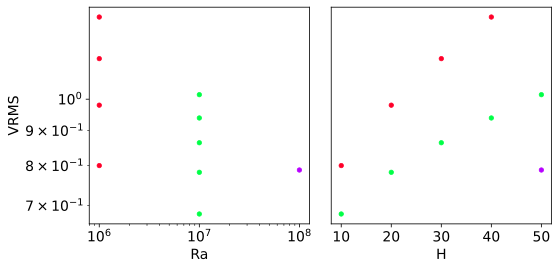

In [8]:
colors = plt.cm.gist_rainbow(np.linspace(0,0.9,lenRa))

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

fig = plt.figure(figsize=(8,4))

ax1 = plt.subplot(121)
for i in range(lenRa):
    plt.plot(dataS[i]['Ra'],dataS[i]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
plt.ylabel('VRMS'); plt.xlabel('Ra');
plt.yscale('log'); 
plt.xscale('log');

ax2 = plt.subplot(122, sharey = ax1)
for i in range(lenRa):
    plt.plot(dataS[i]['H'],dataS[i]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
plt.xlabel('H'); 
# plt.yscale('log');
ax2.yaxis.set_visible(False)
fig.tight_layout();

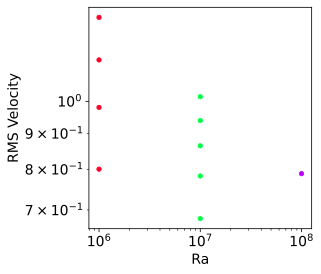

In [9]:
list1 = []; list2 = [];

for i in range(lenRa):
    plt.plot(dataS[i]['Ra'],dataS[i]['VRMS'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])

list1.append(Data['Ra'].tolist());
list2.append(Data['VRMS'].tolist());
list1 = flatten_list(list1)
list2 = flatten_list(list2)

plt.ylabel('RMS Velocity'); plt.xlabel('Ra');
plt.yscale('log'); plt.xscale('log');

def fol(x,a,b):
    return b*x**a
def fol2(x,a):
    return a*x**(2/3)

# m1, _ = curve_fit(fol,list1,list2); m2, _ = curve_fit(fol2,list1,list2)

# xx = np.arange(1e4,np.max(RaU),1e4)
# s='{}'.format(round(m1[0],4));

# plt.plot(xx,fol(xx,m1[0],m1[1]),label=r'$Nu \backsim Ra^{'+s+'}$')
# plt.plot(xx,fol2(xx,m2[0]),label=r'$Nu \backsim Ra^{2/3}$');

# plt.legend(frameon=False,prop={'size': 12},loc='right', bbox_to_anchor=(1.6, 0.5));

# image_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Images\\'
# plt.savefig(image_path + 'scaling_vrms.png',pad_inches=0.1,bbox_inches='tight');

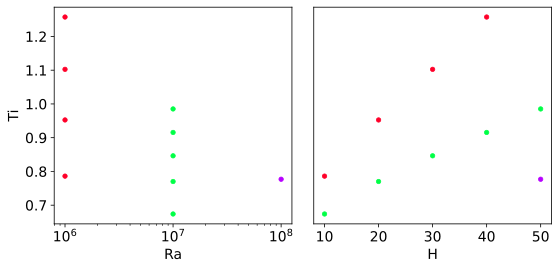

In [10]:
colors = plt.cm.gist_rainbow(np.linspace(0,0.9,lenRa))

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

fig = plt.figure(figsize=(8,4))

ax1 = plt.subplot(121)
for i in range(lenRa):
    plt.plot(dataS[i]['Ra'],dataS[i]['Ti'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
plt.ylabel('Ti'); plt.xlabel('Ra');
# plt.yscale('log'); 
plt.xscale('log');

ax2 = plt.subplot(122, sharey = ax1)
for i in range(lenRa):
    plt.plot(dataS[i]['H'],dataS[i]['Ti'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
plt.xlabel('H'); 
# plt.yscale('log');
ax2.yaxis.set_visible(False)
fig.tight_layout();

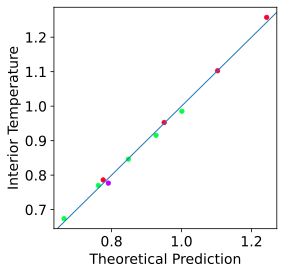

In [11]:
colors = plt.cm.gist_rainbow(np.linspace(0,0.9,lenRa))

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

fig = plt.figure(figsize=(4,4))

for i in range(lenRa):
    plt.plot(TiScaling[0]+TiScaling[1]*(dataS[i]['H']**(3/4))*(dataS[i]['Ra']**(-1/4)),dataS[i]['Ti'],'.',\
             label=('{}'.format(fmt(int(Data.iloc[[i]]['Ra'])))),color=colors[i])
plt.ylabel('Interior Temperature'); plt.xlabel('Theoretical Prediction');
plt.axline((0.7, 0.7), slope=1);
# plt.yscale('log');

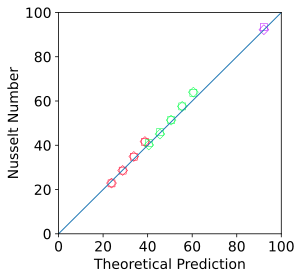

In [12]:
plt.rcParams['lines.markersize'] = 7.
fig = plt.figure(figsize=(4,4))

for i in range(lenRa):
    var1 = NuScaling[1]*(-1000 + dataS[i]['Ra'])**NuScaling[0] + 0.5*dataS[i]['H'];
#     var1 = 0.206*(-1000 + dataS[i]['Ra'])**0.318 + 0.5*dataS[i]['H']+1;
#     var1 = NuScaling[2]*(-1000 + dataS[i]['Ra'])**NuScaling[0] + NuScaling[1]*dataS[i]['H'];
    plt.plot(var1,dataS[i]['NuT'],'s',color=colors[i],mfc='none',mew=0.5)
    plt.plot(var1,dataS[i]['NuB']+dataS[i]['H'],'D',color=colors[i],mfc='none',mew=0.5)
plt.ylabel('Nusselt Number'); plt.xlabel('Theoretical Prediction');
plt.axline((40, 40), slope=1);
plt.ylim((0,100));
plt.xlim((0,100));